#### Diabetes Prediction 


1. Pregnancies (integer): Number of times pregnant.
2. Glucose (integer): Plasma glucose concentration after 2 hours in an oral glucose tolerance test.
3. BloodPressure (integer): Diastolic blood pressure (mm Hg).
4. SkinThickness (integer): Triceps skinfold thickness (mm).
5. Insulin (integer): 2-Hour serum insulin (mu U/ml).
6. BMI (float): Body mass index (weight in kg/(height in m)^2).
7. DiabetesPedigreeFunction (float): Diabetes pedigree function, a function that scores likelihood of diabetes based on family history.
8. Age (integer): Age in years.
9. Outcome (integer): Binary variable indicating whether a person has diabetes or not (1 for diabetes, 0 for no diabetes).

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
#Shape of the dataset

df.shape

(768, 9)

In [59]:
#size of the dataset

df.size

6912

In [60]:
# datatypes of the dataset

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [61]:
# Checking for null values

df.isnull().sum()  #There are no null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
# Checking for duplicated values

df.duplicated().sum()

0

### Basic Stats 

In [63]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Outlier detection and analysis 

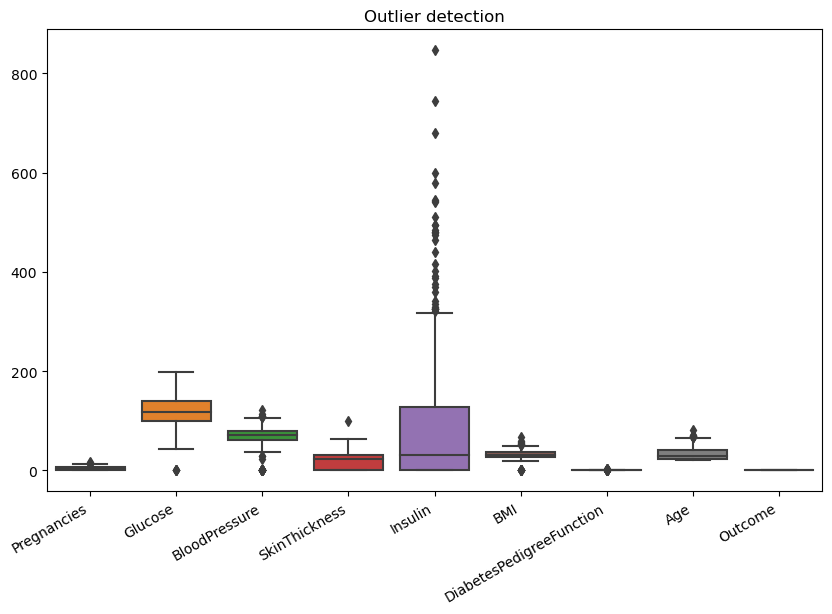

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title('Outlier detection')
plt.xticks(rotation=
           30, ha='right')
plt.show()

#### Inference:

1. Insulin has the most outliers compared to other variables

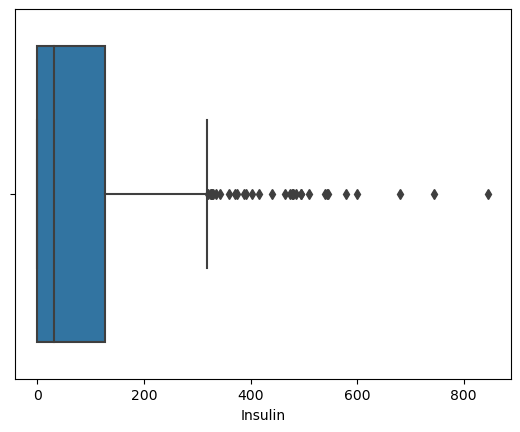

In [66]:
sns.boxplot(x=df['Insulin'])
plt.show()

In [67]:
# Outlier Treatment

# performing Transformation for more balanced distribution and reducing the impact of outliers
df['Insulin'] = np.log1p(df['Insulin'])

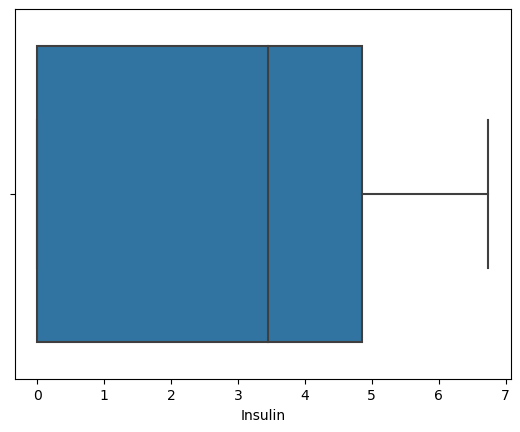

In [68]:
sns.boxplot(x=df['Insulin'])
plt.show()

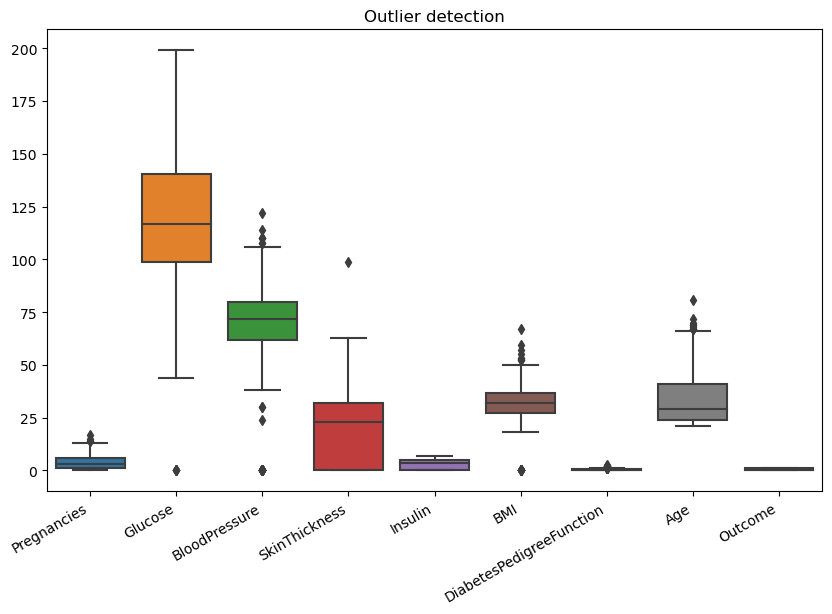

In [70]:
# Outliers after transformation 

plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title('Outlier detection')
plt.xticks(rotation=
           30, ha='right')
plt.show()

#### Correlation Matrix

In [71]:
correlation_matrix = df.corr()


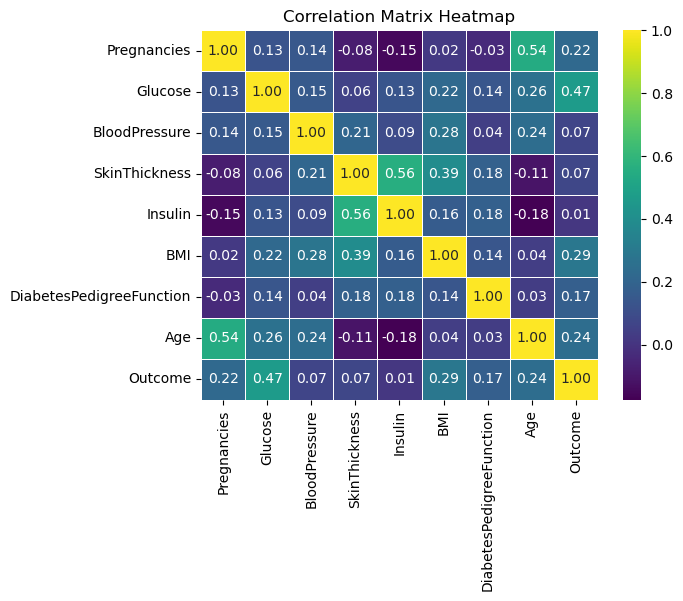

In [109]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

1. Outcome has a positive correlation of 0.47 with Glucose
2. Age has a positive correlation of 0.54 with Pregnancies

#### EDA

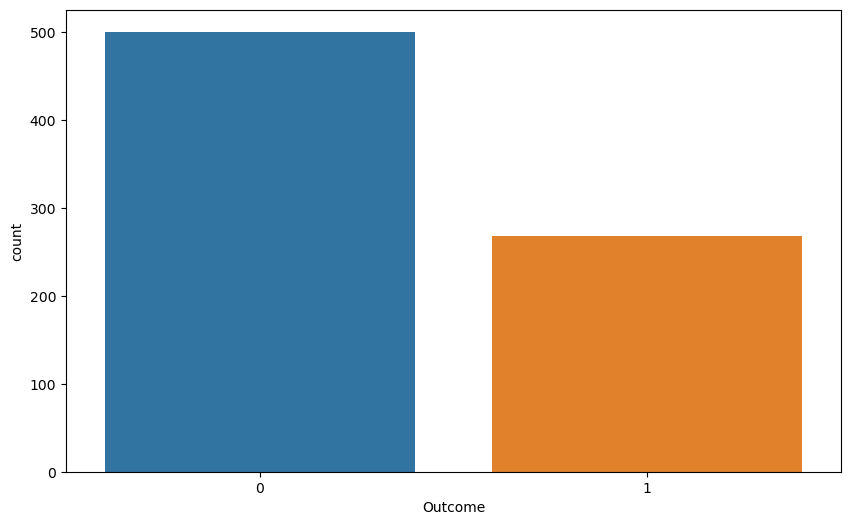

In [73]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10,6))
sns.countplot(x='Outcome', data=df)
plt.show()



<Figure size 1000x800 with 0 Axes>

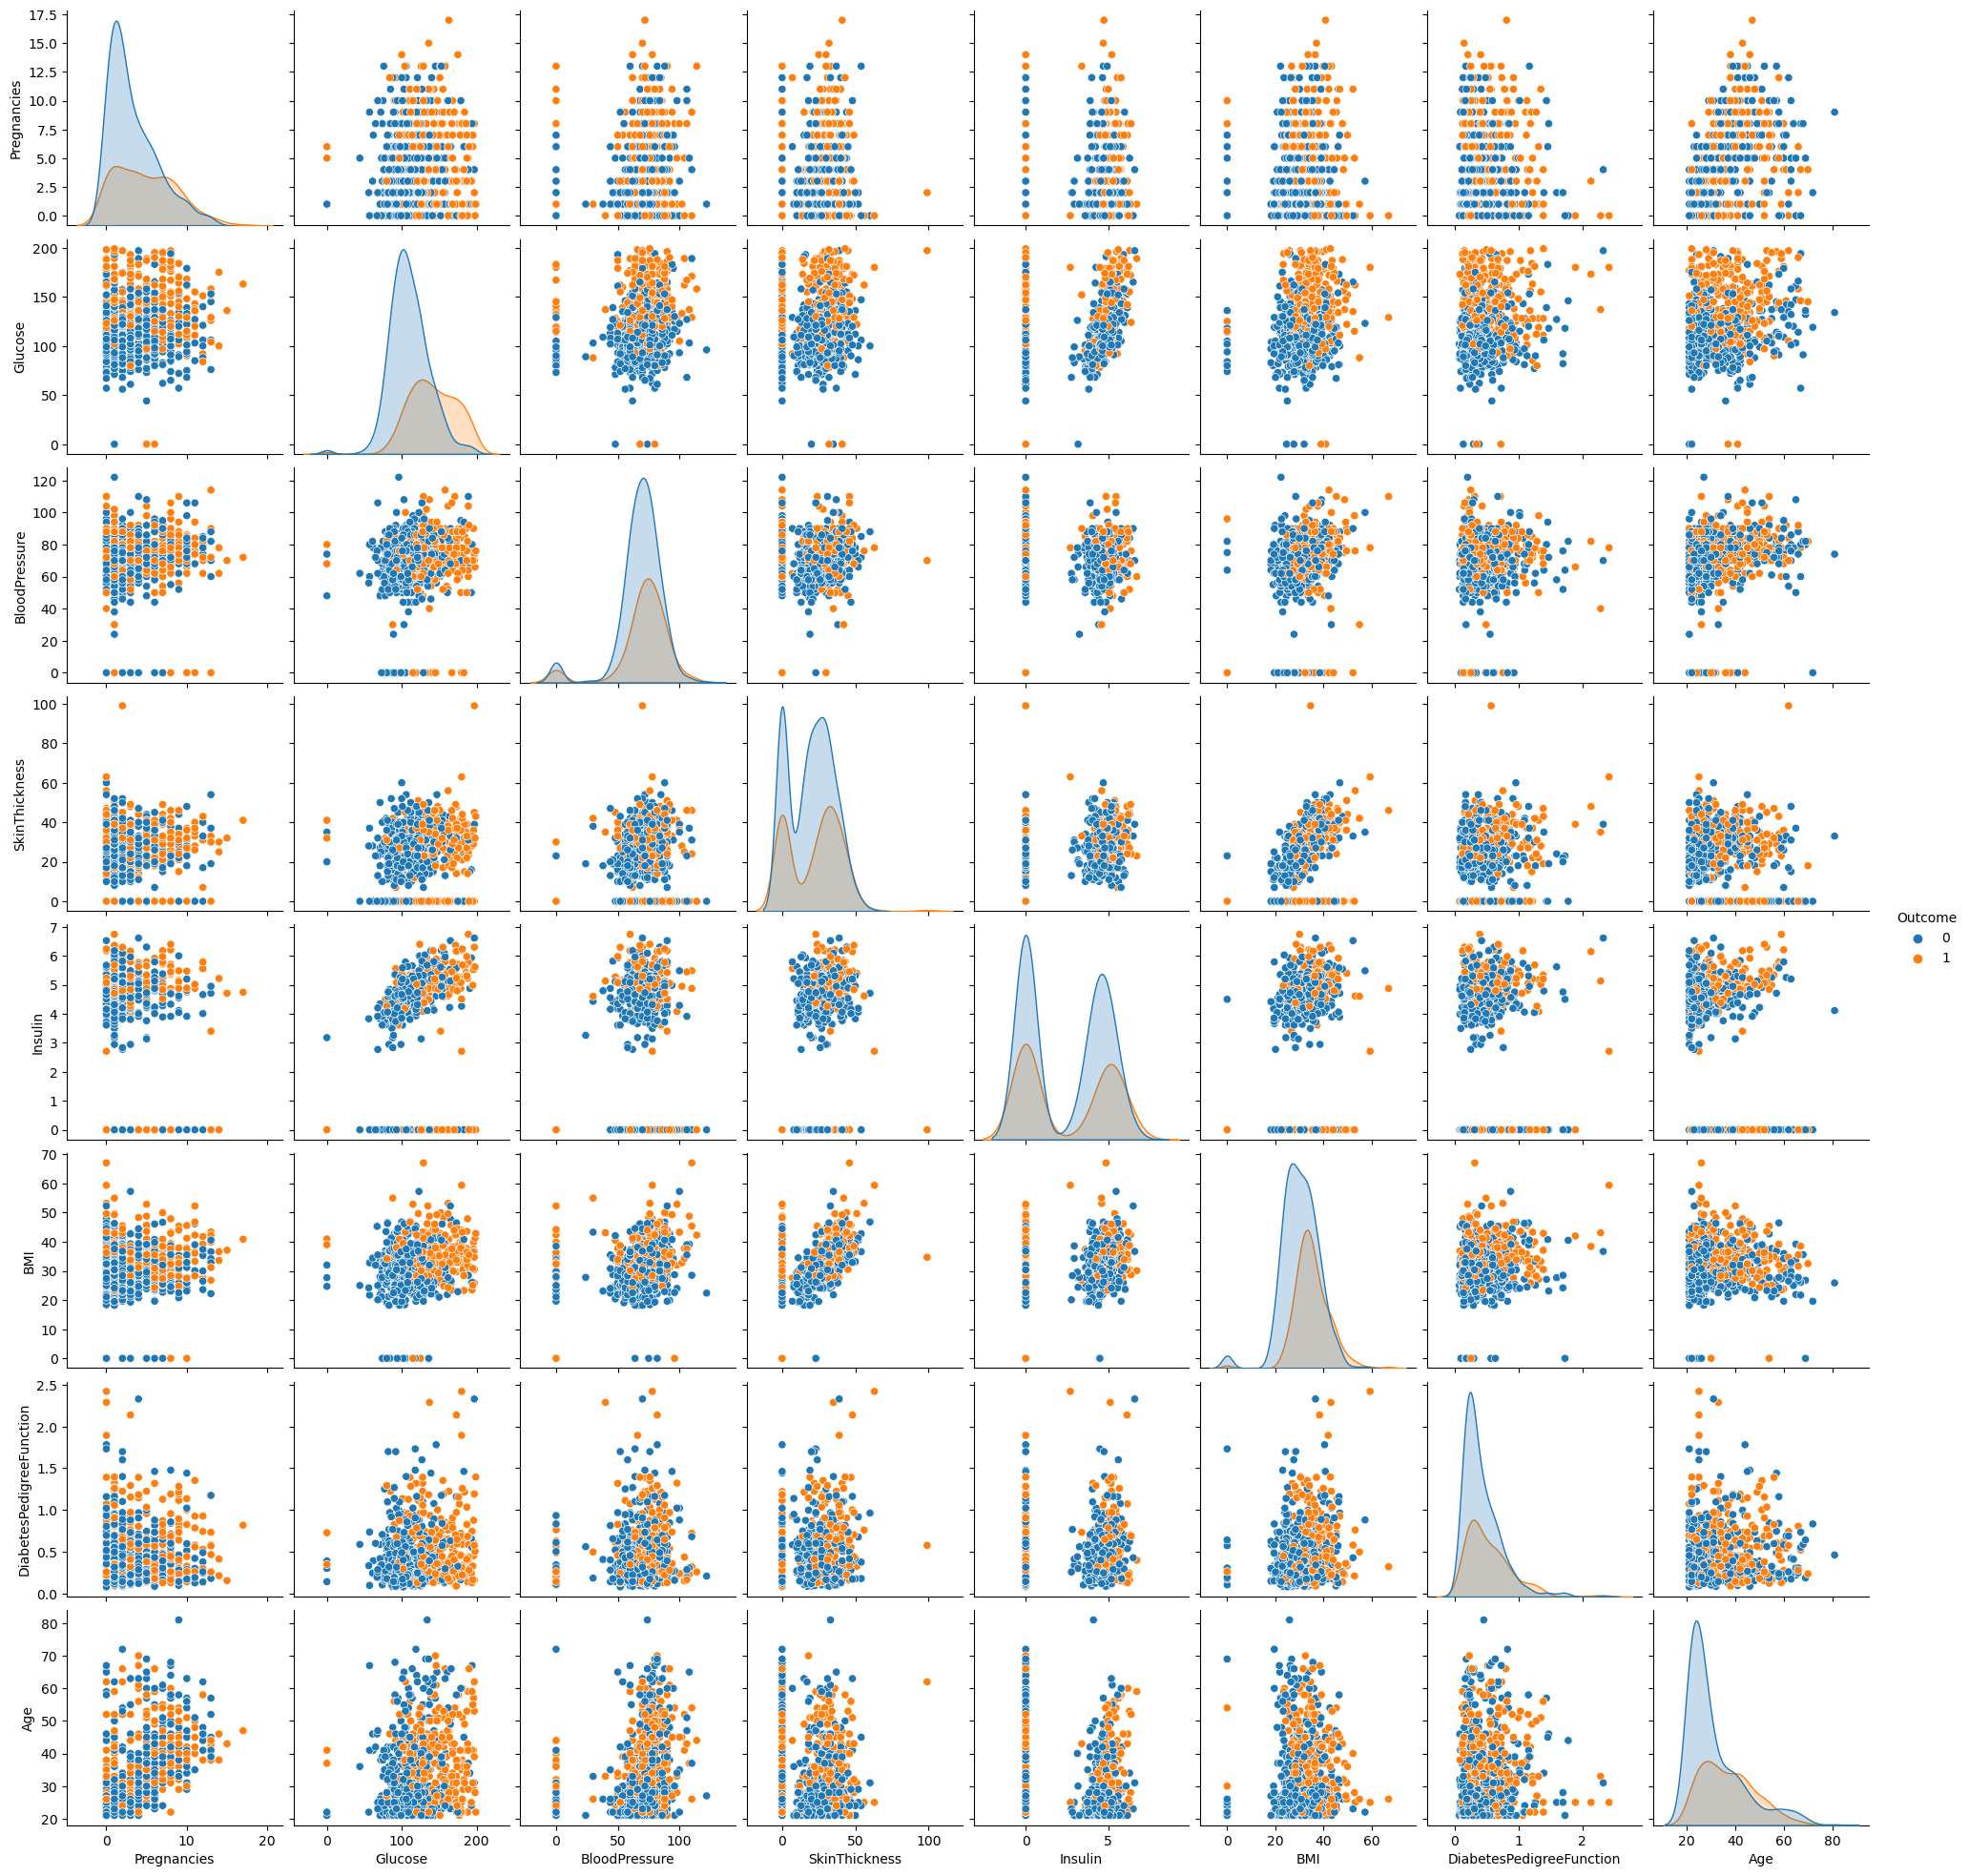

In [74]:
# Visualize the distribution of numerical features
plt.figure(figsize=(10,8))
sns.pairplot(df, hue='Outcome')
plt.show()

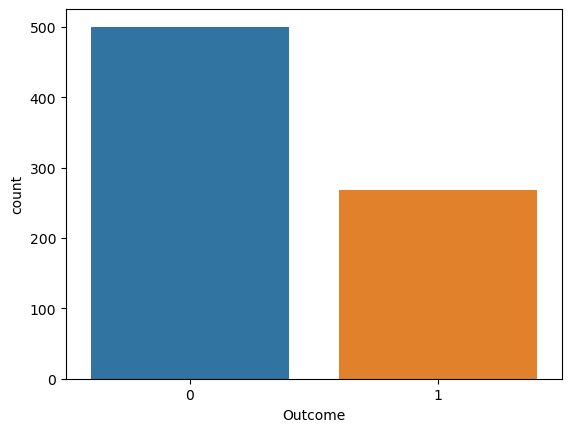

In [75]:
# Imbalance check for target variable

sns.countplot(x='Outcome', data=df)
plt.show()

### Feature Selection

In [79]:
X = df.drop('Outcome', axis = 1)

y = df['Outcome']  # Target variable

### Splitting the data

In [80]:
from sklearn.model_selection import train_test_split


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
#75% for model training and 25% for model testing

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Model development

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
regression = LogisticRegression(random_state=16)

In [96]:
# fit the model with data
regression.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [87]:
# Predict the model 

y_pred = regression.predict(X_test)

### Model evaluation

1. Accuracy

In [97]:
accuracy = accuracy_score(y_test, y_pred)


In [107]:
print('Accuracy of LR:',accuracy)

Accuracy of LR: 0.8125


##### 2. Confusion matrix

In [102]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[116,   9],
       [ 27,  40]], dtype=int64)

##### Confusion matrix evaluation metrics - Classfiication report

In [103]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.81      0.93      0.87       125
   with diabetes       0.82      0.60      0.69        67

        accuracy                           0.81       192
       macro avg       0.81      0.76      0.78       192
    weighted avg       0.81      0.81      0.80       192



#### ROC Curve

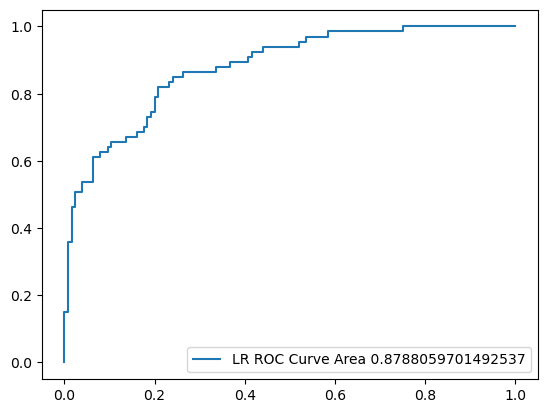

In [106]:
y_pred_proba = regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="LR ROC Curve Area "+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.88. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

#### Inference:

##### 1. Accuracy 

1. An accuracy of 0.8125 (81.25%) on the logistic regression model indicates that the model is correctly predicting the target variable for approximately 81.25% of the observations in the test set.

##### 2. Confusion Matrix:

True Negative (TN): 116
False Positive (FP): 9
False Negative (FN): 27
True Positive (TP): 40

- True Negative (TN): 116 - The number of instances where the model correctly predicted the negative class (0).
- False Positive (FP): 9 - The number of instances where the model incorrectly predicted the positive class (1) when the actual class was negative.
- False Negative (FN): 27 - The number of instances where the model incorrectly predicted the negative class when the actual class was positive.
- True Positive (TP): 40 - The number of instances where the model correctly predicted the positive class.

##### 3.Classification Report

1. Precision: The ability of the classifier not to label as positive a sample that is negative.

        Precision for "without diabetes": 0.81 (81%)
        Precision for "with diabetes": 0.82 (82%)
        
2. Recall (Sensitivity): The ability of the classifier to find all the positive samples.

        Recall for "without diabetes": 0.93 (93%)
        Recall for "with diabetes": 0.60 (60%)
        
3. F1-Score: The harmonic mean of precision and recall. It provides a balance between precision and recall.

        F1-score for "without diabetes": 0.87 (87%)
        F1-score for "with diabetes": 0.69 (69%)
        
4. Support: The number of actual occurrences of the class in the specified dataset.

5. Accuracy: The ratio of correctly predicted observation to the total observations.

        Accuracy: 0.81 (81%)
        
6.  Avg: The average of precision, recall, and F1-score calculated independently for each class and then averaged.

        Macro Avg Precision: 0.81 (81%)
        Macro Avg Recall: 0.76 (76%)
        Macro Avg F1-Score: 0.78 (78%)
        
7. Weighted Avg: The weighted average of precision, recall, and F1-score, where each class's score is weighted by its support.

        Weighted Avg Precision: 0.81 (81%)
        Weighted Avg Recall: 0.81 (81%)
        Weighted Avg F1-Score: 0.80 (80%)

- The model performs well in identifying instances "without diabetes" (high precision and recall) but has lower recall for instances "with diabetes." 


##### For model improvement

1. Feature Engineering
2. Hyperparameter Tuning
3. Class Imbalance handling
4. Model comparison
5. Ensemble Methods
6. Advanced Techniques: gradient boosting
7. Cross-Validation
8. Threshold Adjustment

- By default, logistic regression predicts a positive class when the predicted probability is greater than 0.5. You can experiment with different threshold values to balance precision and recall.